###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from [this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/The Finite-Difference Method/fd_taylor_operators_advanced.ipynb) by Heiner Igel ([@heinerigel](https://github.com/heinerigel)), Lion Krischer ([@krischer](https://github.com/krischer)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

###### Translated by Huizhe Di @ SCSIO

# 提高有限差分算子的精确性基于泰勒级数展开

在通过计算泰勒级数展开的余数来估计有限差分算子的精度之后，下一个的问题是我们如何提高有限差分近似的精度。


## 通过泰勒级数展开估计有限差分算子

在 [这节课中](http://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/03_Intro_finite_differences/1_fd_intro.ipynb), 我们把三点有限差分近似引入到函数的二阶导数中:

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx \frac{f(x+dx)-2f(x)+f(x-dx)}{dx^2} \nonumber
\end{equation}

从泰勒级数展开. 在这里，我想介绍一种更系统的方法来推导这个算子，这是以后提高有限差分算子精度所必需的。

 $f(x + dx)$ 在 $x$ 附近的泰勒展开被定义为： 

$$
f(x+dx)=\sum_{n=0}^\infty \frac{f^{(n)}(x)}{n!}dx^{n}  
$$

有限差分算子可以通过寻找必须将函数值相乘才能获得插值或导数的权重来计算 (这里: $a$, $b$, $c$) 


### 例子: 二阶导数

我们希望根据点处的函数值近似函数的二阶导数 $f(x+dx)$, $f(x)$ 和 $f(x-dx)$:

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx a ~ f(x+dx) + b ~ f(x) + c ~ f(x-dx)
\end{equation}

导数中的单个项可以用以下泰勒级数展开到二次项来表示：

$$
\begin{align}
a ~ f(x + dx) & \ = \ a ~ \left[ ~  f(x) +  \frac{\partial f(x)}{\partial x} dx +  \frac{1}{2!}  \frac{\partial^2 f(x)}{\partial x^2} dx^2   + \dotsc  ~ \right] \nonumber\\
b ~ f(x) & \  = \ b ~ \left[ ~  f(x)  ~ \right] \nonumber\\
c ~ f(x - dx) & \ = \ c ~ \left[ ~  f(x) -  \frac{\partial f(x)}{\partial x} dx +  \frac{1}{2!}  \frac{\partial^2 f(x)}{\partial x^2} dx^2   - \dotsc  ~ \right] \nonumber
\end{align}
$$

把这些近似导入到方程 (1)，并且整理后得到

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx a ~ f(x+dx) + b ~ f(x) + c ~ f(x-dx) \approx \nonumber
\end{equation}
$$
\begin{align}
f(x) ~ \biggl[&a  ~~+~~            ~~~~b           &+~~  c\biggr] \notag\\
+dx ~ \frac{\partial f(x)}{\partial x} ~ \biggl[&a  ~~\phantom{+}~~ \phantom{b}  &-~~  c\biggr] \notag\\
+\frac{dx^2}{2!} ~ \frac{\partial^2 f(x)}{\partial x^2} ~ \biggl[&a  ~~\phantom{+}~~ \phantom{b}  &+~~  c\biggr] \notag
\end{align}
$$

此方程的右边只能是以下值的近似值 $\frac{\partial^2 f(x)}{\partial x^2}$, 如果满足以下条件:

$$
\begin{align}
&a  ~~+~~            ~~~~b           &+~~  c & = & 0 \notag\\
&a  ~~\phantom{+}~~ \phantom{b}  &-~~  c & = & 0 \notag\\
&a  ~~\phantom{+}~~ \phantom{b}  &+~~  c & = & \frac{2!}{\mathrm{d}x^2}\notag
\end{align}
$$

这个线性方程组可以用矩阵形式表示为:

$$
\begin{pmatrix}
  1 & 1 & 1 \\
  1 & 0 & -1 \\
  1 & 0 & 1
 \end{pmatrix}
\begin{pmatrix}
  a\\
 b \\
 c
 \end{pmatrix}
 =\begin{pmatrix}
  0\\
 0 \\
 \frac{2!}{dx^2}
 \end{pmatrix}
$$

或者 

\begin{equation}
\mathbf{Ax ~= ~s}\nonumber
\end{equation}

使用系统矩阵 $\mathbf{A}$, 向量 $\mathbf{x}$ 包含了想要的有限差分算子的权重 $a,\; b,\; c$ 和解矢量 $\mathbf{s}$. 从形式上看，有限差分算子权重可以通过矩阵反演来估计:

\begin{equation}
\mathbf{x ~= A^{-1}~s}\nonumber
\end{equation}

我们尝试通过符号矩阵反转来估计有限差分的权重，使用 `SymPy`:

In [1]:
# import SymPy libraries
from sympy import *

In [2]:
# Define symbols
a, b, c, dx = symbols('a b c dx')

# In SymPy we define the matrix equation by a matrix consisting of the 
# system matrix A and an additional column defining the solution vector s
system = Matrix(([1, 1, 1, 0], [1, 0, -1, 0], [1, 0, 1, 2/dx**2]))

# Symbolic solution of the linear system can be easily obtained by linsolve
linsolve(system, (a, b, c))

{(dx**(-2), -2/dx**2, dx**(-2))}

所以，权重系数为:

$$
\begin{pmatrix}
a \\
b\\
c
\end{pmatrix}
=\begin{pmatrix}
\frac{1}{\mathrm{d}x^2} \\
-\frac{2}{\mathrm{d}x^2} \\
\frac{1}{\mathrm{d}x^2}
\end{pmatrix}
$$

把系数 $a,\; b,\; c$ 导入到方程 (1) 得到

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx \frac{f(x+dx)-2f(x)+f(x-dx)}{dx^2}, \nonumber
\end{equation}

这是众所周知的二阶导数的三点算子

## 提高二阶导数有限差分近似的准确性

我们可以使用以上方法估计更高阶和更精确的有限差分算子. 假设我们要用五而不是三点运算符来近似二阶导数, 在点 $f(x+2dx)$, $f(x+dx)$, $f(x)$, $f(x-dx)$ 和 $f(x-2dx)$:

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx a ~ f(x+2dx) + b ~ f(x+dx) + c ~ f(x) + d ~ f(x-dx) + e ~ f(x-2dx) \notag
\end{equation}

为了求解五个未知的有限差分权重, 我们不得不把泰勒级数展开到五项, 这会导致更高阶的误差级数，因此得到一个更加准确的有限差分算子相较于三点. 由此产生的泰勒级数展开是:

$$
\begin{align}
a ~ f(x + 2dx) & \ = \ a ~ \left[ ~  f(x) +  2 \frac{\partial f(x)}{\partial x} dx +  \frac{4}{2}  \frac{\partial^2 f(x)}{\partial x^2} dx^2 +  \frac{8}{6}  \frac{\partial^3 f(x)}{\partial x^3} dx^3 +  \frac{16}{24}  \frac{\partial^4 f(x)}{\partial x^4} dx^4   + \dotsc  ~ \right] \nonumber\\
b ~ f(x + dx) & \ = \ b ~ \left[ ~  f(x) +  \frac{\partial f(x)}{\partial x} dx +  \frac{1}{2} \frac{\partial^2 f(x)}{\partial x^2} dx^2 +  \frac{1}{6} \frac{\partial^3 f(x)}{\partial x^3} dx^3 +  \frac{1}{24}  \frac{\partial^4 f(x)}{\partial x^4} dx^4   + \dotsc  ~ \right] \nonumber\\
c ~ f(x) & \  = \ c ~ \left[ ~  f(x)  ~ \right] \nonumber\\
d ~ f(x - dx) & \ = \ d ~ \left[ ~  f(x) -  \frac{\partial f(x)}{\partial x} dx +  \frac{1}{2} \frac{\partial^2 f(x)}{\partial x^2} dx^2 -  \frac{1}{6} \frac{\partial^3 f(x)}{\partial x^3} dx^3 +  \frac{1}{24}  \frac{\partial^4 f(x)}{\partial x^4} dx^4   + \dotsc  ~ \right] \nonumber\\
e ~ f(x - 2dx) & \ = \ e ~ \left[ ~  f(x) -  2 \frac{\partial f(x)}{\partial x} dx +  \frac{4}{2}  \frac{\partial^2 f(x)}{\partial x^2} dx^2 -  \frac{8}{6} \frac{\partial^3 f(x)}{\partial x^3} dx^3 +  \frac{16}{24} \frac{\partial^4 f(x)}{\partial x^4} dx^4   + \dotsc  ~ \right] \nonumber
\end{align}
$$

与三点操作相似, 我们把项插入到五点有限差分近似中，并对项进行排序

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx a ~ f(x+2dx) + b ~ f(x+dx) + c ~ f(x) + d ~ f(x-dx) + e ~ f(x-2dx)  \approx \nonumber
\end{equation}
$$
\begin{align}
f(x) ~ \biggl[&a  ~~+~~   b   ~~+~~ c ~~+~~  d ~~+~~  e~~           \biggr] \notag\\
+dx ~ \frac{\partial f(x)}{\partial x} ~ \biggl[&2a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~-~~  d ~~-~~  2e~~           \biggr] \notag\\
+\frac{dx^2}{2} ~ \frac{\partial^2 f(x)}{\partial x^2} ~ \biggl[&4a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~+~~  d ~~+~~  4e~~           \biggr] \notag\\
+\frac{dx^3}{6} ~ \frac{\partial^3 f(x)}{\partial x^3} ~ \biggl[&8a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~-~~  d ~~-~~  8e~~           \biggr] \notag\\
+\frac{dx^4}{24} ~ \frac{\partial^4 f(x)}{\partial x^4} ~ \biggl[&16a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~+~~  d ~~+~~  16e~~           \biggr] \notag\\
\end{align}
$$

导致以下条件:

$$
\begin{align}
\biggl[&a  ~~+~~   b   ~~+~~ c ~~+~~  d ~~+~~  e~~           \biggr] ~=~ 0 \notag\\
\biggl[&2a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~-~~  d ~~-~~  2e~~           \biggr] ~=~ 0 \notag\\
\biggl[&4a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~+~~  d ~~+~~  4e~~           \biggr] ~=~ \frac{2}{dx^2} \notag\\
\biggl[&8a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~-~~  d ~~-~~  8e~~           \biggr] ~=~ 0\notag\\
\biggl[&16a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~+~~  d ~~+~~  16e~~           \biggr] ~=~ 0\notag\\
\end{align}
$$

或作为矩阵方程:

$$
\begin{pmatrix}
  1 & 1 & 1 & 1 & 1 \\
  2 & 1 & 0 & -1 & -2 \\
  4 & 1 & 0 & 1 & 4 \\
  8 & 1 & 0 & -1 & -8 \\
  16 & 1 & 0 & 1 & 16 \\
 \end{pmatrix}
\begin{pmatrix}
  a\\
 b \\
 c \\
 d \\
 e \\
 \end{pmatrix}
 =\begin{pmatrix}
  0\\
 0 \\
 \frac{2!}{dx^2} \\
 0 \\
 0
 \end{pmatrix}
 \nonumber
$$

In [3]:
# Define symbols
a, b, c, d, e, dx = symbols('a b c d e dx')

# In SymPy we define the matrix equation by a matrix consisting of the 
# system matrix A and an additional column defining the solution vector s
system = Matrix(([1, 1, 1, 1, 1, 0], [2, 1, 0, -1, -2, 0], [4, 1, 0, 1, 4, 2/dx**2], [8, 1, 0, -1, -8, 0], [16, 1, 0, 1, 16, 0]))

# Symbolic solution of the linear system can be easily obtained by linsolve
linsolve(system, (a, b, c, d, e))

{(-1/(12*dx**2), 4/(3*dx**2), -5/(2*dx**2), 4/(3*dx**2), -1/(12*dx**2))}

因此，五点有限差分运算符的结果加权系数为:

$$
\begin{pmatrix}
a \\
b\\
c\\
d\\
e
\end{pmatrix}
=\begin{pmatrix}
-\frac{1}{12\mathrm{d}x^2} \\
 \frac{4}{3\mathrm{d}x^2} \\
-\frac{5}{2\mathrm{d}x^2}\\
\frac{4}{3\mathrm{d}x^2}\\
-\frac{1}{12\mathrm{d}x^2}
\end{pmatrix}
$$

##### 练习

研究五点算子对一维声学波动方程基于有限差分的解的影响:

* 实现五点运算符以近似一维声学有限差分建模代码中的空间二阶导数。添加一个选项以使用三点运算符
* 比较三点和五点运算符对建模结果的影响，通过绘制分析地震图 $d^{analyt}$ 和有限差分地震图 $d^{FD}$ 和它们的不同。 使用 $v_0 = 333\; m/s$, $dx = 2\; m$ 和 $dt = 1\;ms$ 作为建模的系数. 根据数据残差的 L2 范数量化数据拟合:
\begin{equation}
E = \frac{1}{2}\sum_{i=0}^{nt}\biggl(d^{FD}_i-d^{analyt}_i\biggr)^2\nonumber
\end{equation}
这里 $nt$ 表示时间点的个数
* 使用 magic 函数 `%timeit` 对三点和五点运算符的运行时进行基准测试并进行比较， 和相同的时空模型离散化 $dx$ 和 $dt$ 确保可以得到能比较的结果
* 估计参数 $\zeta$ 在 Courant criterion:
\begin{equation}
dt \le \frac{dx}{\zeta v_{max}}\nonumber
\end{equation}
对于五点运算符的正演计算. 开始的模型参数为 $v_{max} = 333\; m/s$ 和 $dx = 0.5\; m$ 和 the Courant criterion for the 3pt operator ($\zeta=1$). 变化 $\zeta$ 在不同的尝试中, 直到解决了稳定和不稳定有限差分解决方案之间的转换

In [5]:
# Import Libraries 
# ----------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Definition of modelling parameters
# ----------------------------------
xmax = 500 # maximum spatial extension of the 1D model (m)
dx   = 0.5 # grid point distance in x-direction

tmax = 1.001   # maximum recording time of the seismogram (s)
dt   = 0.0010  # time step

vp0  = 333.   # P-wave speed in medium (m/s)

# acquisition geometry
xr = 365.0 # receiver position (m)
xsrc = 249.5 # source position (m)

f0   = 25. # dominant frequency of the source (Hz)
t0   = 4. / f0 # source time shift (s)

In [9]:
# 1D Wave Propagation (Finite Difference Solution) 
# ------------------------------------------------
def FD_1D_acoustic(dt,dx,op):
        
    nx = (int)(xmax/dx) # number of grid points in x-direction        
    nt = (int)(tmax/dt) # maximum number of time steps            
    
    ir = (int)(xr/dx)      # receiver location in grid in x-direction    
    isrc = (int)(xsrc/dx)  # source location in grid in x-direction

    # Source time function (Gaussian)
    # -------------------------------
    src  = np.zeros(nt + 1)
    time = np.linspace(0 * dt, nt * dt, nt)

    # 1st derivative of a Gaussian
    src  = -2. * (time - t0) * (f0 ** 2) * (np.exp(- (f0 ** 2) * (time - t0) ** 2))

    # Analytical solution
    # -------------------
    G    = time * 0.

    # Initialize coordinates
    # ----------------------
    x    = np.arange(nx)
    x    = x * dx       # coordinate in x-direction

    for it in range(nt): # Calculate Green's function (Heaviside function)
        if (time[it] - np.abs(x[ir] - x[isrc]) / vp0) >= 0:
            G[it] = 1. / (2 * vp0)
    seis_ana   = np.convolve(G, src * dt)
    seis_ana   = seis_ana[0:nt]
    
    # Initialize empty pressure arrays
    # --------------------------------
    p    = np.zeros(nx) # p at time n (now)
    pold = np.zeros(nx) # p at time n-1 (past)
    pnew = np.zeros(nx) # p at time n+1 (present)
    d2px = np.zeros(nx) # 2nd space derivative of p

    # Initialize model (assume homogeneous model)
    # -------------------------------------------
    vp    = np.zeros(nx)
    vp    = vp + vp0       # initialize wave velocity in model

    # Initialize empty seismogram
    # ---------------------------
    seis = np.zeros(nt)    
    
    # Calculate Partial Derivatives
    # -----------------------------
    for it in range(nt):
    
        # FD approximation of spatial derivative by 3 point operator
        if(op==3):
            for i in range(1, nx - 1):
                d2px[i] = (p[i + 1] - 2 * p[i] + p[i - 1]) / dx ** 2
        
        # ADD YOUR 5-POINT FD OPERATOR HERE 
        if(op==5):
            for i in range(1, nx - 2):
                d2px[i] = (p[i + 2]*(-1)/12 + 4*p[i+1]/3 - 5 * p[i]/2 + 4*p[i-1]/3 - p[i-2]/12) / dx ** 2
                
        # Time Extrapolation
        # ------------------
        pnew = 2 * p - pold + vp ** 2 * dt ** 2 * d2px

        # Add Source Term at isrc
        # -----------------------
        # Absolute pressure w.r.t analytical solution
        pnew[isrc] = pnew[isrc] + src[it] / dx * dt ** 2
                
        # Remap Time Levels
        # -----------------
        pold, p = p, pnew
    
        # Output of Seismogram
        # --------------------
        seis[it] = p[ir]
        
    return time, seis, seis_ana

In [10]:
dx = 2.0 # grid point distance in x-direction (m)
dt = 0.0010  # time step (s)

# run FD code with 3-point operator
op = 3 # use 3-point operator
time, seis_3pt, seis_ana = FD_1D_acoustic(dt,dx,op)

# run FD code with 5-point operator
op = 5 # use 5-point operator
# RUN FD CODE WITH 5-POINT OPERATOR HERE!
time_5pt, seis_5pt, seis_ana_5pt = FD_1D_acoustic(dt,dx,op)

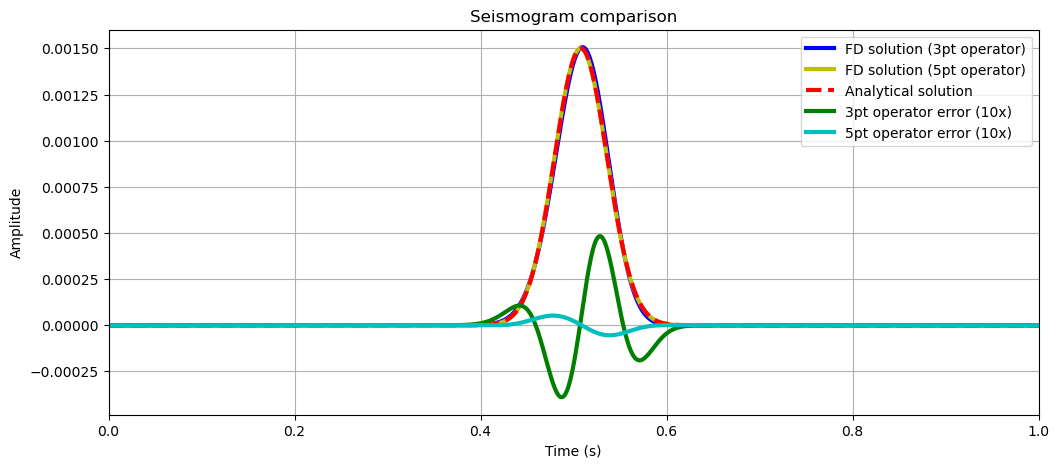

E_3pt =  9.693346990256789e-08
E_5pt =  1.915983966176533e-09


In [15]:
# Compare FD Seismogram with analytical solution
# ---------------------------------------------- 
# Define figure size
rcParams['figure.figsize'] = 12, 5

# plot solution of 3-point FD operator
plt.plot(time, seis_3pt, 'b-',lw=3,label="FD solution (3pt operator)")

# PLOT SOLUTION OF 5-POINT FD OPERATOR HERE!
plt.plot(time_5pt, seis_5pt, 'y-',lw=3,label="FD solution (5pt operator)")

# plot analytical solution
Analy_seis = plt.plot(time,seis_ana,'r--',lw=3,label="Analytical solution") 

# plot difference between analytical and 3pt operator FD solution
plt.plot(time, 10*(seis_3pt-seis_ana), 'g-',lw=3,label="3pt operator error (10x)")

# PLOT DIFFERENCE BETWEEN ANALYTICAL AND 5PT OPERATOR SOLUTION HERE!
plt.plot(time_5pt, 10*(seis_5pt-seis_ana), 'c-',lw=3,label="5pt operator error (10x)")

plt.xlim(time[0], time[-1])
plt.title('Seismogram comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Calculate L2-norm of the data residuals between FD and analytical solution
# 3-point operator
E_3pt = np.sum((seis_3pt-seis_ana)**2)
print("E_3pt = ", E_3pt)

# ADD L2-NORM for 5-POINT OPERATOR HERE!
E_5pt = np.sum((seis_5pt-seis_ana)**2)
print("E_5pt = ", E_5pt)

In [16]:
dx = 2.0 # grid point distance in x-direction
dt = 0.0010  # time step

# Benchmark runtime of 3pt-FD code
op = 3 # use 3-point operator
%timeit time, seis_3pt, seis_ana = FD_1D_acoustic(dt,dx,op)

162 ms ± 791 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
# BENCHMARK RUNTIME OF 5PT-FD CODE HERE!
op = 5 # use 3-point operator
%timeit time_5pt, seis_5pt, seis_ana = FD_1D_acoustic(dt,dx,op)

404 ms ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


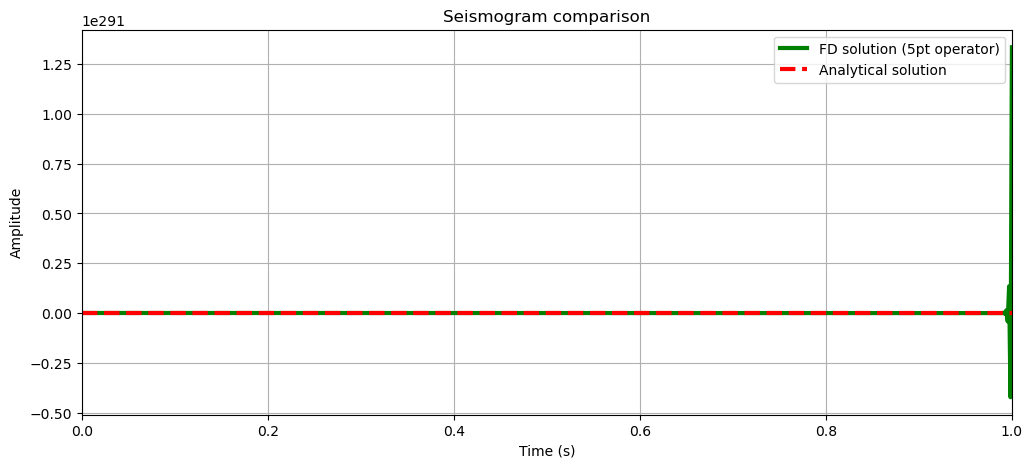

In [20]:
# Estimate Courant criterion for 5pt-FD operator
# ----------------------------------------------

dx = 0.5 # grid point distance in x-direction
zeta = 1.0
dt = dx / (zeta*vp0)
op = 5 # use 5-point operator
# RUN FD CODE WITH 5-POINT OPERATOR HERE!
time_5pt, seis_5pt, seis_ana_5pt = FD_1D_acoustic(dt,dx,op)

# PLOT SOLUTION OF 5-POINT FD OPERATOR HERE!
plt.plot(time_5pt, seis_5pt, 'g-',lw=3,label="FD solution (5pt operator)")

# plot analytical solution
Analy_seis = plt.plot(time,seis_ana,'r--',lw=3,label="Analytical solution") 

plt.xlim(time[0], time[-1])
plt.title('Seismogram comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## 我们学习到:

* 使用泰勒级数计算有限差分算子
* 如何推导高阶有限差分算子
* 空间五点算子逼近一维声学波动方程中空间二阶导数的推导与应用